In [1]:
import datetime
from tensorflow.keras.models import Model, load_model
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.layers import Input, UpSampling2D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, Conv2DTranspose
import numpy as np
from skimage import io, color
from keras.preprocessing import image
import numpy as np
from skimage import io, color, transform
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
import os
image_size = 256

now = datetime.datetime.now()

def read_image(img_id, dir):
    try:
        img = load_img(dir + "/" + img_id, target_size=(image_size,image_size))
        img = img_to_array(img)
        return img
    except:
        return None

model = load_model("/home/carlos/Image_Colorization/output/MSE/2019-02-24--19h02m/best.hdf5")


Using TensorFlow backend.


MSE

Collected images
Preprocessed images


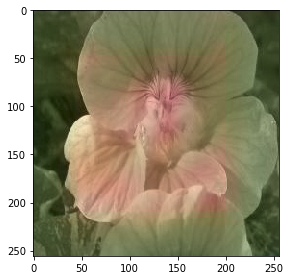

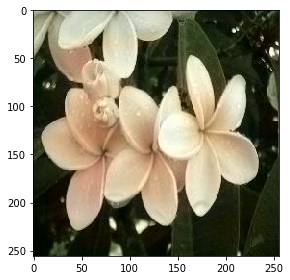

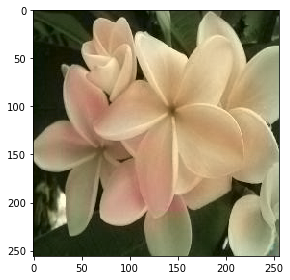

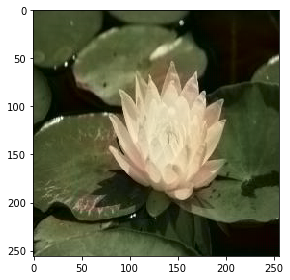

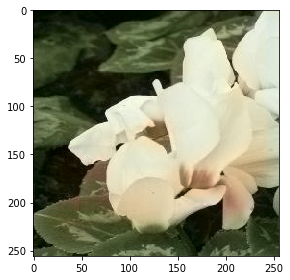

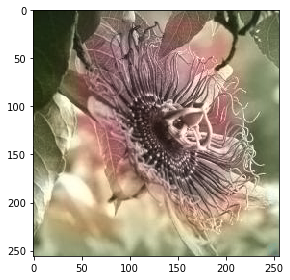

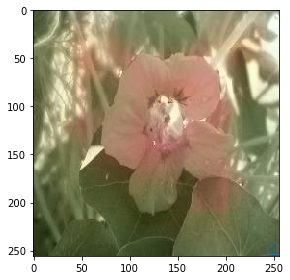

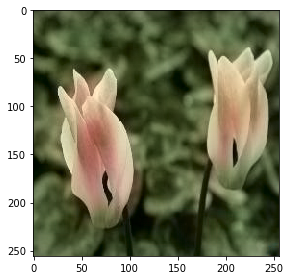

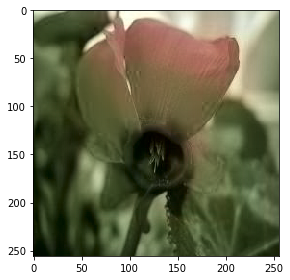

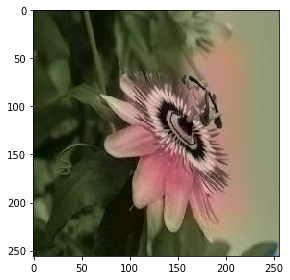

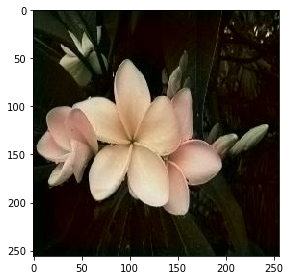

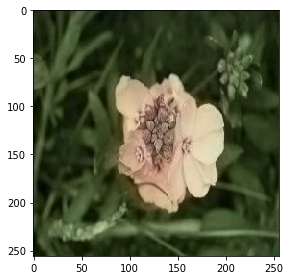

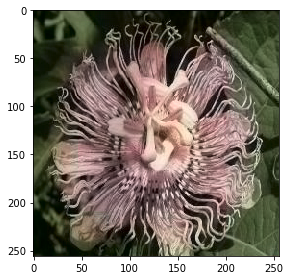

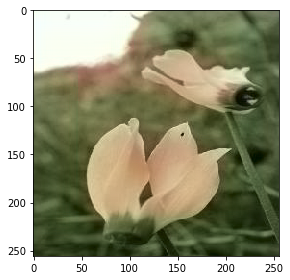

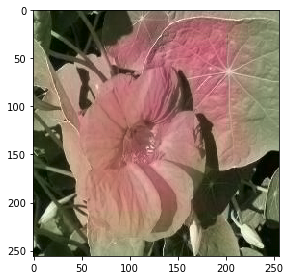

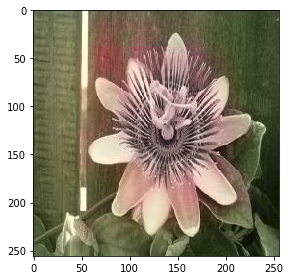

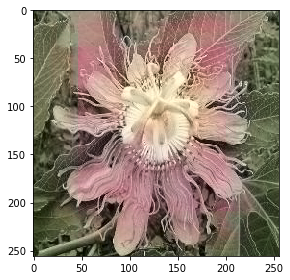

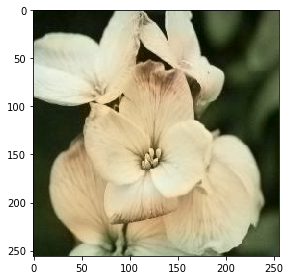

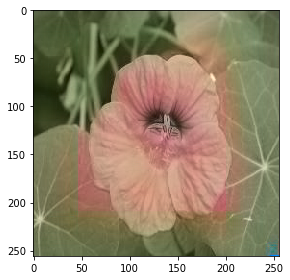

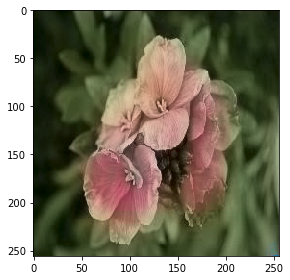

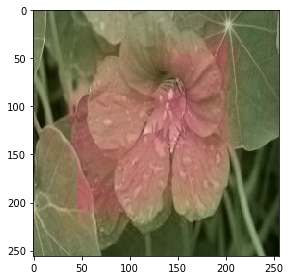

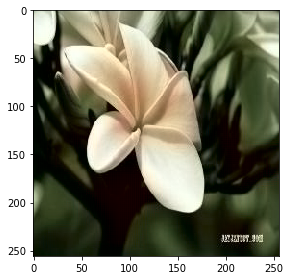

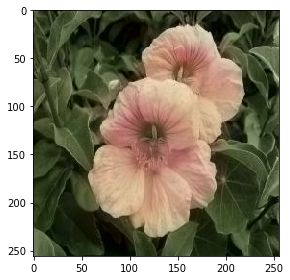

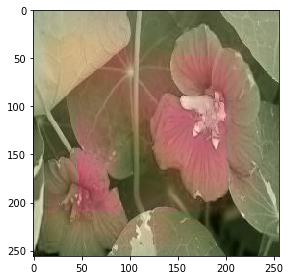

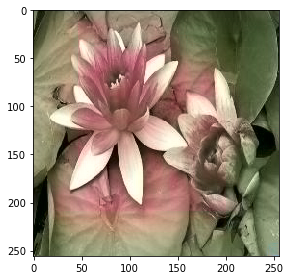

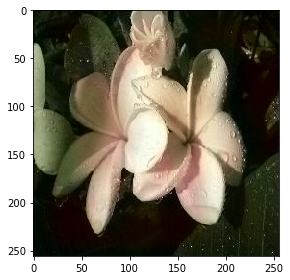

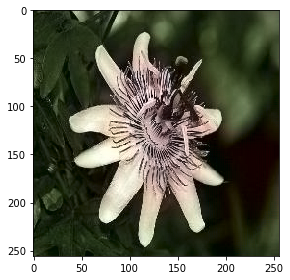

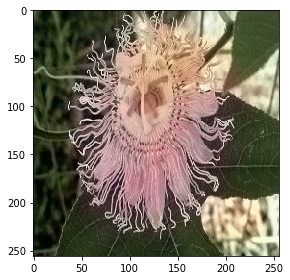

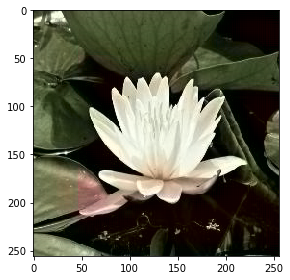

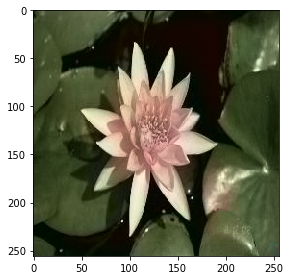

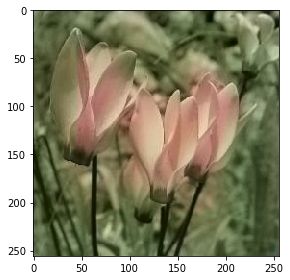

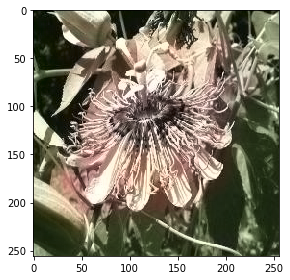

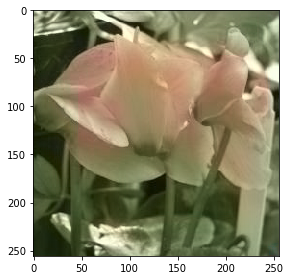

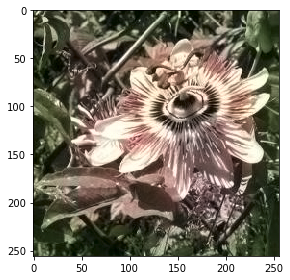

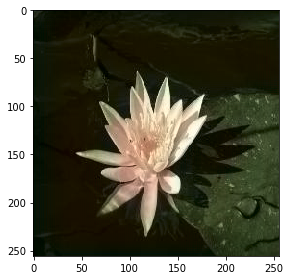

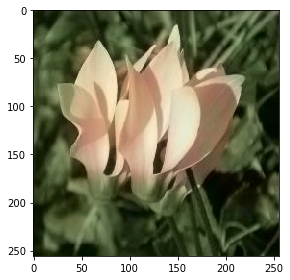

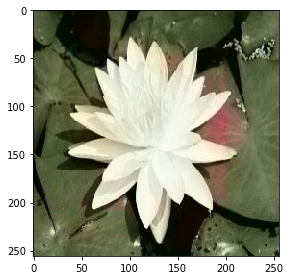

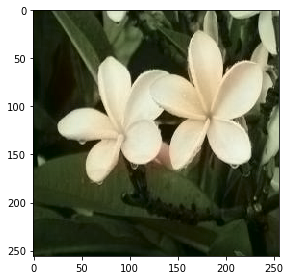

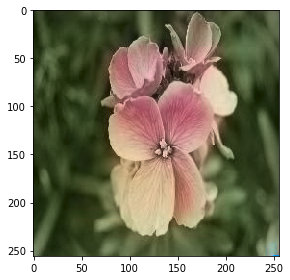

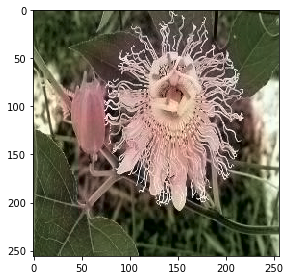

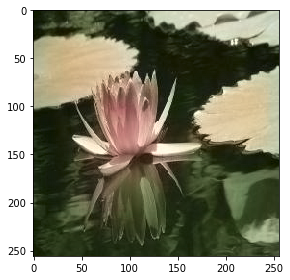

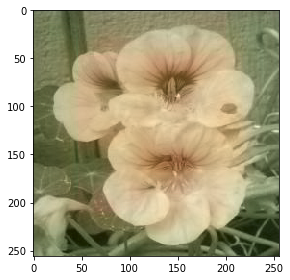

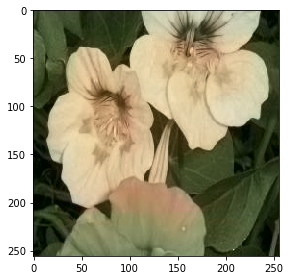

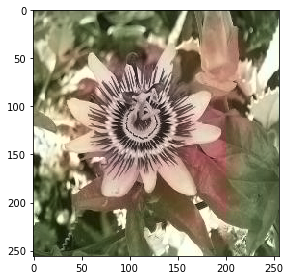

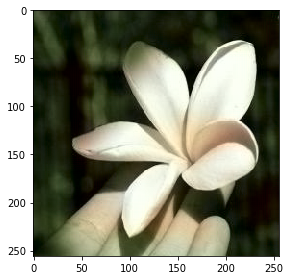

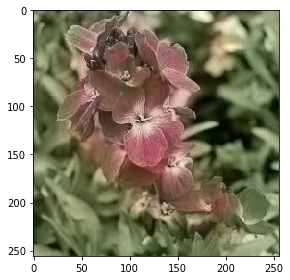

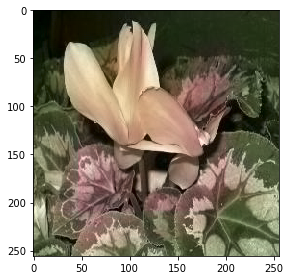

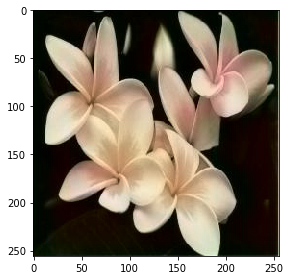

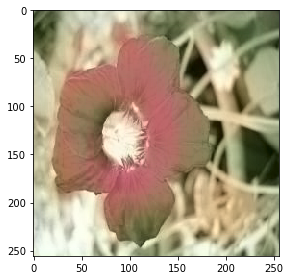

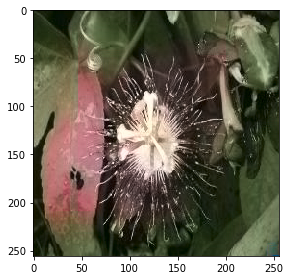

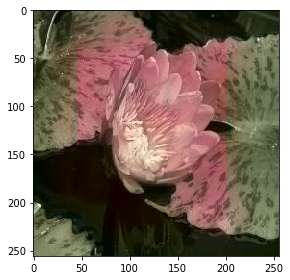

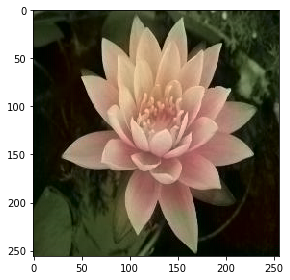

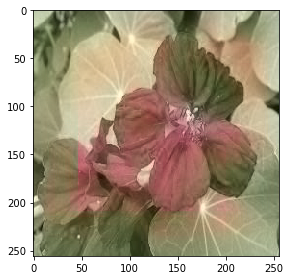

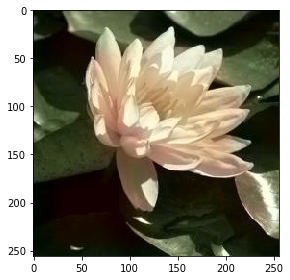

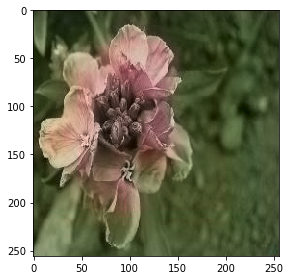

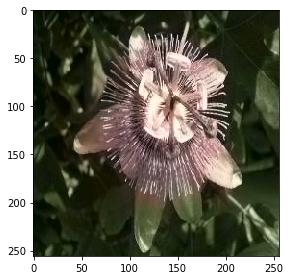

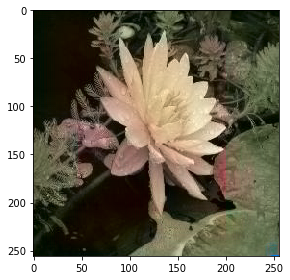

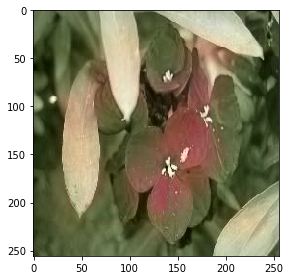

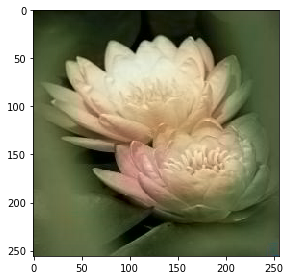

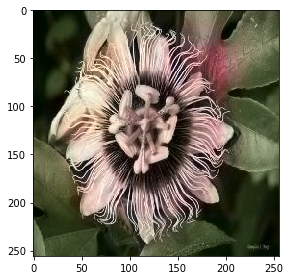

In [3]:
directory = "/home/carlos/Image_Colorization/data/flowers_val/flowers_val"
files = [f for f in os.listdir(directory)[:60] if os.path.isfile(os.path.join(directory, f))]
Xtest = []
for image in files:
    img = read_image(image, directory)
    if not img is None:
        img = np.array(img, dtype=float)
        Xtest.append(img)
        
print("Collected images")
Xtest = np.array(Xtest, dtype=float)
Xtest = 1.0/255*Xtest
inputs = color.rgb2lab(Xtest)[:, :, :, 0]
inputs_2 = inputs - 50
inputs_2 = inputs_2 / 50
inputs_2 = inputs_2.reshape(inputs_2.shape+(1,))
inputs = inputs.reshape(inputs.shape+(1,))
print("Preprocessed images")
# Test model
output = model.predict(inputs_2)
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((image_size, image_size, 3))
    cur[:,:,0] = inputs[i][:,:,0]
#     cur[:,:,0] = 50
    cur[:,:,1:] = output[i]
    io.imshow(color.lab2rgb(cur))
    plt.show()

In [6]:
from keras import backend as K
K.clear_session()